# Taiwan Bankruptcy Prediction
#### by Gary Schwaeber and Sunil Rao

## Overview

### Business Problem
The business problem we are trying to solve is to help bank lenders by creating a predictive model for which companies will go bankrupt. The greatest risk and cost to the lender would be to lend to a company that eventually goes bankrupt and thus losing all principle and interest that company would owe. Therefore we will optimize our model and feature selection process to capture the best recall score. By optimizing for recall score we will be able to best predict the greatest proportion of companies that go bankrupt out of companies that actually went bankrupt. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks 

from code import modeling_functions

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)

## Data

The dataset, which was downloaded from Kaggle, contains financial ratios and a bankrupcty indicator for approximately 7000 Taiwanese companies. The data, which was originally gathered for a [research report](https://isslab.csie.ncu.edu.tw/download/publications/1.pdf) and was taken from the Taiwan Economic
Journal for the years 1999–2009. Per the report, Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Company industries include manufacturing, shipping, tourism, retail, and others, but not financial.

We brought in 75 of the original 95 columns we deemed potentially significant. All original feature columns were numerical financial ratios with one binary categorical column (Liability-Assets Flag). Numerous variables had significant outliers which we primarily identified by looking where the max values were greater than 1. Here we found instances where there were groups of companies with ratios in millions or billions vs the majority of companies having ratios under 1. In some instance we binned or categorized those variables and in some instances we capped the variable.

There is a class imbalance in the data where approximately 97% of the companies did not go bankrupt and 3% did. To handle this imbalance in our modelling, we tested each model using SMOTE and/or Tomek Links.


In [2]:
df = pd.read_csv('data/data.csv')

df = modeling_functions.clean_data(df)
cleaned_df = df.copy()

In [3]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Cash flow rate,Interest-bearing debt interest rate,Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Total Asset Turnover,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,No-credit Interval,Gross Profit to Sales,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Allocation rate per person
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.302646,1.256969e-04,0.458143,0.000725,0.022102,0.848195,0.688979,0.217535,4.980000e+09,0.002259,0.001208,0.629951,0.021266,0.207576,0.086957,1.820926e-04,1.165007e-04,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.339077,0.025592,0.903225,0.064856,7.010000e+08,6.550000e+09,0.593831,0.424206,0.676269,0.339077,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.622879,0.601453,0.290202,0.026601,0.564050,0.016469,0.037135
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.303556,2.897851e-04,0.461867,0.000647,0.022080,0.848088,0.689702,0.217620,6.110000e+09,0.006016,0.004039,0.635172,0.012502,0.171176,0.064468,9.360000e+09,7.190000e+08,0.751111,0.127236,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.329740,0.023947,0.931065,0.025516,1.065198e-04,7.700000e+09,0.593916,0.468828,0.308589,0.329740,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.623652,0.610237,0.283846,0.264577,0.570175,0.020794,0.012335
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.302035,2.361297e-04,0.458521,0.000790,0.022760,0.848094,0.689470,0.217601,7.280000e+09,0.011543,0.005348,0.629631,0.021248,0.207516,0.014993,6.500000e+07,2.650000e+09,0.829502,0.340201,0.602806,0.000991,0.006302,5.340000e+09,0.098162,0.336731,0.277456,0.013879,0.446027,0.334777,0.003715,0.909903,0.021387,1.791094e-03,1.022676e-03,0.594502,0.276179,0.446027,0.334777,0.642765,0.459254,0.538491,0.314515,0.025346,0,0.774670,0.623841,0.601449,0.290189,0.026555,0.563706,0.016474,0.141016
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.303350,1.078888e-04,0.465705,0.000449,0.022046,0.848005,0.689110,0.217568,4.880000e+09,0.004194,0.002896,0.630228,0.009572,0.151465,0.089955,7.130000e+09,9.150000e+09,0.725754,0.161575,0.225815,0.018851,0.002961,1.010646e-03,0.098715,0.348716,0.276580,0.003540,0.615848,0.331509,0.022165,0.906902,0.024161,8.140000e+09,6.050000e+09,0.593889,0.559144,0.615848,0.331509,0.579039,0.448518,0.604105,0.302382,0.067250,0,0.739555,0.622929,0.583538,0.281721,0.026697,0.564663,0.023982,0.021320
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.303475,7.890000e+09,0.462746,0.000686,0.022096,0.84825

In [4]:
df.shape

(6780, 60)

In [5]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Cash flow rate,Interest-bearing debt interest rate,Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Total Asset Turnover,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,No-credit Interval,Gross Profit to Sales,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Allocation rate per person
count,6780.000000,6780.000000,6780.000000,6780.000000,6780.000000,6780.000000,6780.000000,6780.000000,6780.000000,6.780000e+03,6780.000000,6.780000e+03,6780.000000,6780.000000,6780.000000,6780.000000,6.780000e+03,6780.000000,6.780000e+03,6780.000000,6.780000e+03,6780.000000,6780.000000,6.780000e+03,6.780000e+03,6780.000000,6780.000000,6780.000000,6780.000000,6.780000e+03,6.780000e+03,6780.000000,6780.000000,6780.000000,6.780000e+03,6780.000000,6780.000000,6.780000e+03,6780.000000,6780.000000,6.780000e+03,6.780000e+03,6780.000000,6780.000000,6780.000000,6780.000000,6780.000000,6780.000000,6780.000000,6780.000000,6780.000000,6780.000000,6780.000000,6780.000000,6780.000000,6780.000000,6780.000000,6780.000000,6780.000000,6.780000e+03
mean,0.031416,0.505698,0.559163,0.554130,0.607969,0.607950,0.998981,0.797403,0.303523,2.001858e+09,0.467451,1.639808e+07,0.022403,0.848106,0.689261,0.217682,5.519422e+09,0.014783,8.424779e+06,0.631091,4.196313e+06,0.112917,0.141814,2.152918e+09,1.010480e+09,0.814530,0.400906,0.522825,0.124427,2.501475e+06,3.603746e+07,0.090389,0.353855,0.277467,5.479006e+07,0.761624,0.331372,5.447158e+07,0.935059,0.028989,1.197340e+09,2.168871e+09,0.593990,0.249277,0.761624,0.331372,0.649926,0.461872,0.593731,0.315626,0.030997,0.000737,0.808164,0.624001,0.607967,0.280310,0.027550,0.565422,0.047144,1.080726e+07
std,0.174452,0.059729,0.064486,0.060468,0.014441,0.014420,0.000670,0.001195,0.001267,3.241783e+09,0.015113,1.079465e+08,0.012089,0.003192,0.010793,0.009689,2.893179e+09,0.017158,2.453868e+08,0.008256,1.681785e+08,0.052536,0.100590,3.251682e+09,2.479758e+09,0.057869,0.201616,0.217442,0.139410,1.457514e+08,5.042181e+08,0.048693,0.034069,0.009636,5.784112e+08,0.205981,0.009763,5.718938e+08,0.022090,0.024002,2.824899e+09,3.379840e+09,0.000259,0.199313,0.205981,0.009763,0.046623,0.028721,0.057565,0.011852,0.024872,0.027148,0.038307,0.009647,0.014441,0.010890,0.015709,0.011201,0.046260,2.923305e+08
min,0.000000,0.066933,0.057185,0.054821,0.156308,0.156308,0.973424,0.752969,0.235090,1.000256e-04,0.306652,0.000000e+00,0.004282,0.736430,0.180701,0.095759,1.000017e-04,0.000163,1.004383e-04,0.459985,1.112540e-04,0.000272,0.001499,1.001223e-04,1.006142e-04,0.494210,0.001469,0.001407,0.000184,1.199931e-04,1.008563e-04,0.000847,0.014723,0.176457,0.000000e+00,0.000862,0.234391,0.000000e+00,0.502084,0.00085

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6780 entries, 0 to 6818
Data columns (total 60 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6780 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6780 non-null   float64
 2   ROA(A) before interest and % after tax                   6780 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6780 non-null   float64
 4   Operating Gross Margin                                   6780 non-null   float64
 5   Realized Sales Gross Margin                              6780 non-null   float64
 6   Operating Profit Rate                                    6780 non-null   float64
 7   Pre-tax net Interest Rate                                6780 non-null   float64
 8   Non-industry income and expe

In [7]:
df['Bankrupt?'].value_counts(normalize = True)

0    0.968584
1    0.031416
Name: Bankrupt?, dtype: float64

---

## Exploratory Data Analysis
We found that ROA(A), Debt Ratio %, Net Income to Total Assets, Current Liability to Assets, Working Capital to Total Assets, and Long Term Liability to Current Assets were the ratios that had the strongest correlations and had the highest predictive value for determining bankrupty.

ROA(A) is Net income before interest and % after tax/Total Assets. ROA(A) is an indicator of how profitable a company is relative to its total assets. We can clearly see differences in the distributions for bankrupt companies who have lower and more left skewed ROA(A) relative to not bankrupt companies.

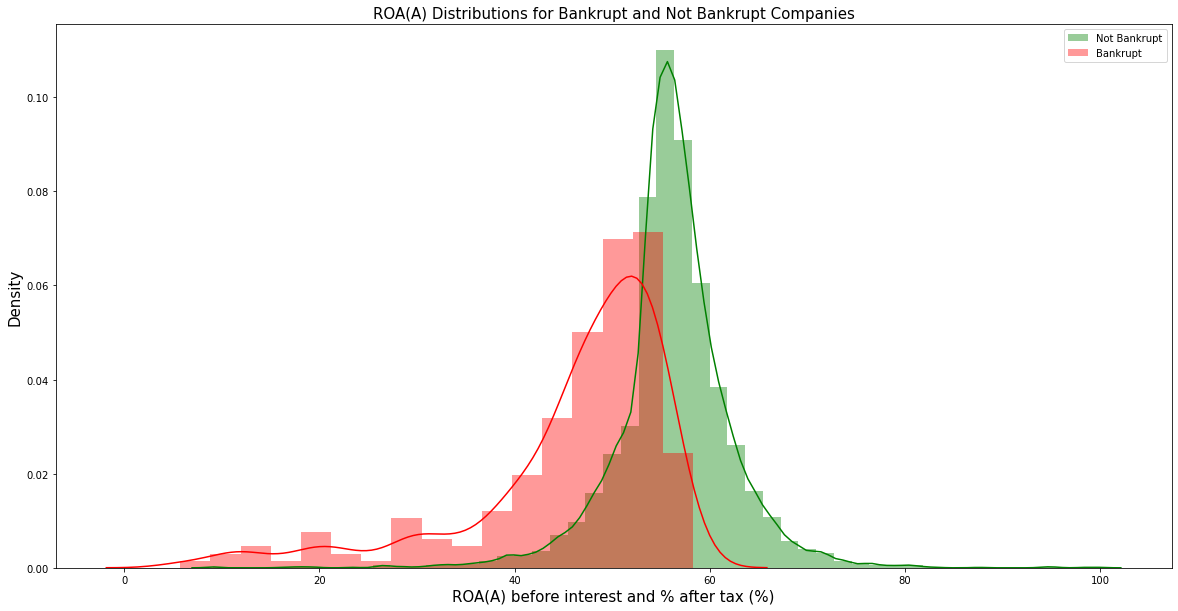

In [8]:
fig,ax = plt.subplots(figsize = (20,10))

ax = sns.distplot(df[df['Bankrupt?']==0]['ROA(A) before interest and % after tax'].apply(lambda x: x*100), color = 'green', label = 'Not Bankrupt')
ax = sns.distplot(df[df['Bankrupt?']==1]['ROA(A) before interest and % after tax'].apply(lambda x: x*100), color = 'red', label = 'Bankrupt')
ax.set_title('ROA(A) Distributions for Bankrupt and Not Bankrupt Companies', fontsize = 15)
ax.set_xlabel('ROA(A) before interest and % after tax (%)', fontsize = 15)
ax.set_ylabel('Density', fontsize = 15)
ax.legend(loc = 'upper right')
# ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

Debt Ratio % is Liability/Total Assets and measures the extent of a company’s leverage. Bankrupt companies tend to have higher and more right skewed debt ratios showing that they are typically more leveraged. 

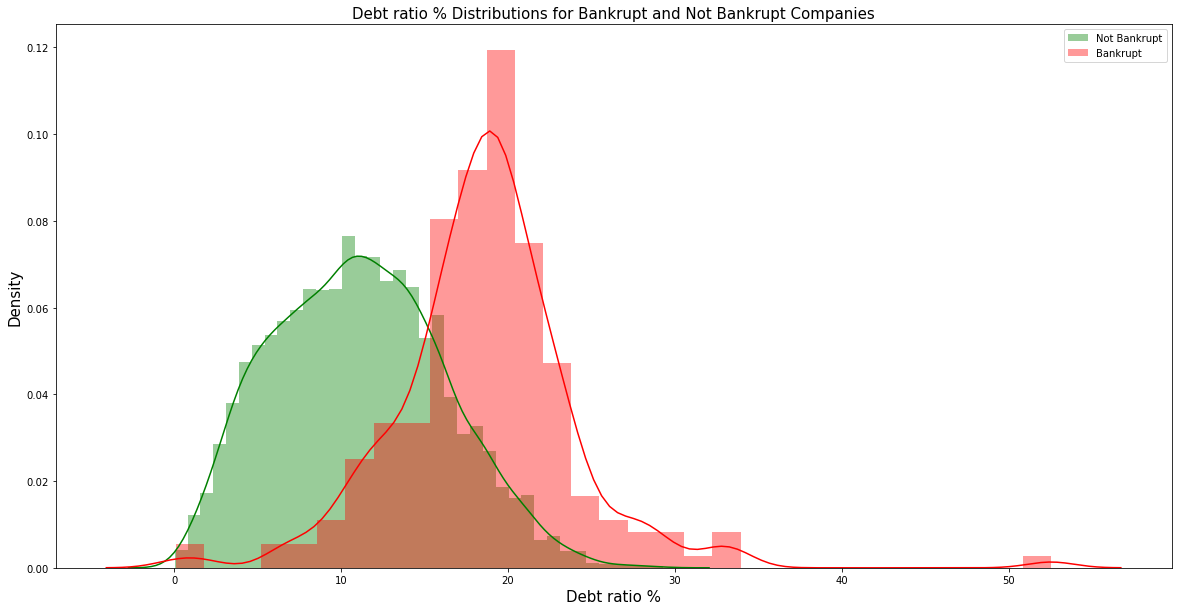

In [9]:
fig,ax = plt.subplots(figsize = (20,10))

ax = sns.distplot(df[df['Bankrupt?']==0]['Debt ratio %'].apply(lambda x: x*100), color = 'green', label = 'Not Bankrupt')
ax = sns.distplot(df[df['Bankrupt?']==1]['Debt ratio %'].apply(lambda x: x*100), color = 'red', label = 'Bankrupt')
ax.set_title('Debt ratio % Distributions for Bankrupt and Not Bankrupt Companies', fontsize = 15)
ax.set_xlabel('Debt ratio %', fontsize = 15)
ax.set_ylabel('Density', fontsize = 15)
ax.legend(loc = 'upper right')

ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

Quick Ratio (aka Acid Test) is an indicator of a company’s short-term liquidity position and measures a company’s ability to meet its short-term obligations with its most liquid assets. We found that 75% of companies that went bankrupt had a Quick Ratio less than .5% while only 25% of companies that didn't go bankrupt had quick ratio that low. 

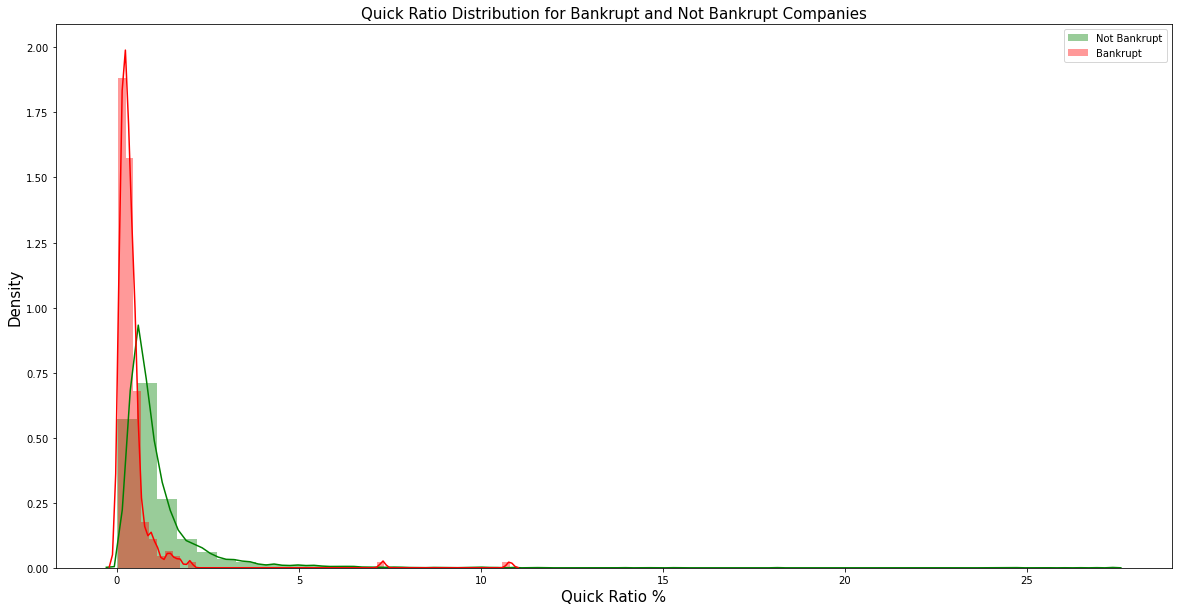

In [10]:
fig,ax = plt.subplots(figsize = (20,10))

ax = sns.distplot(df[(df['Bankrupt?']==0) & (df['Quick Ratio'] <1)]['Quick Ratio'].apply(lambda x: x*100), color = 'green', label = 'Not Bankrupt')
ax = sns.distplot(df[(df['Bankrupt?']==1) & (df['Quick Ratio'] <1)]['Quick Ratio'].apply(lambda x: x*100), color = 'red', label = 'Bankrupt')
ax.set_title('Quick Ratio Distribution for Bankrupt and Not Bankrupt Companies', fontsize = 15)
ax.set_xlabel('Quick Ratio %', fontsize = 15)
ax.set_ylabel('Density', fontsize = 15)
ax.legend(loc = 'upper right')
# ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

Current Liability to Assets is comparable to Debt Ratio % but measures shorter tem liabilities compared to all liabilities. The distribution in the distplot below again shows that bankrupt companies will typically have higher Current Liability to Assets relative to companies that didn't go bankrupt.

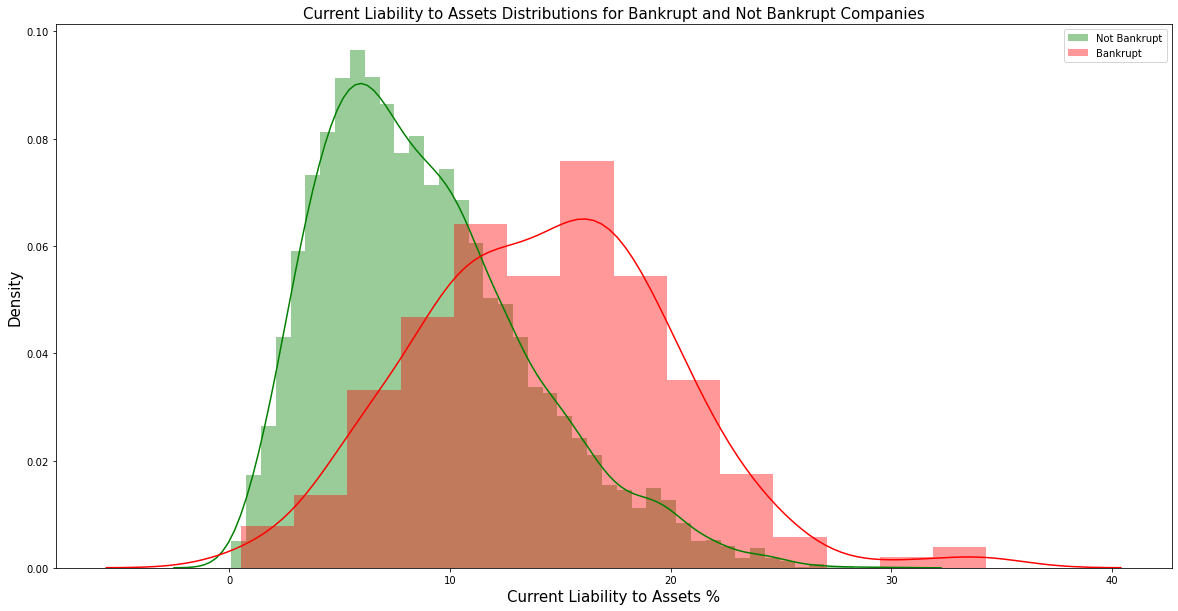

In [11]:
fig,ax = plt.subplots(figsize = (20,10))

ax = sns.distplot(df[df['Bankrupt?']==0]['Current Liability to Assets'].apply(lambda x: x*100), color = 'green', label = 'Not Bankrupt')
ax = sns.distplot(df[df['Bankrupt?']==1]['Current Liability to Assets'].apply(lambda x: x*100), color = 'red', label = 'Bankrupt')
ax.set_title('Current Liability to Assets Distributions for Bankrupt and Not Bankrupt Companies', fontsize = 15)
ax.set_xlabel('Current Liability to Assets %', fontsize = 15)
ax.set_ylabel('Density', fontsize = 15)
ax.legend(loc = 'upper right')
# ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

Working Capital to Total Assets compares liquid assets to total assets. We can see from the distributions that bankrupt companies have smaller ratios of liquid assets to total assets. This may indicate that in time of financial distress, these companies would have more difficult time offloading assets to satisfy their liabilities and avoid bankruptcy.

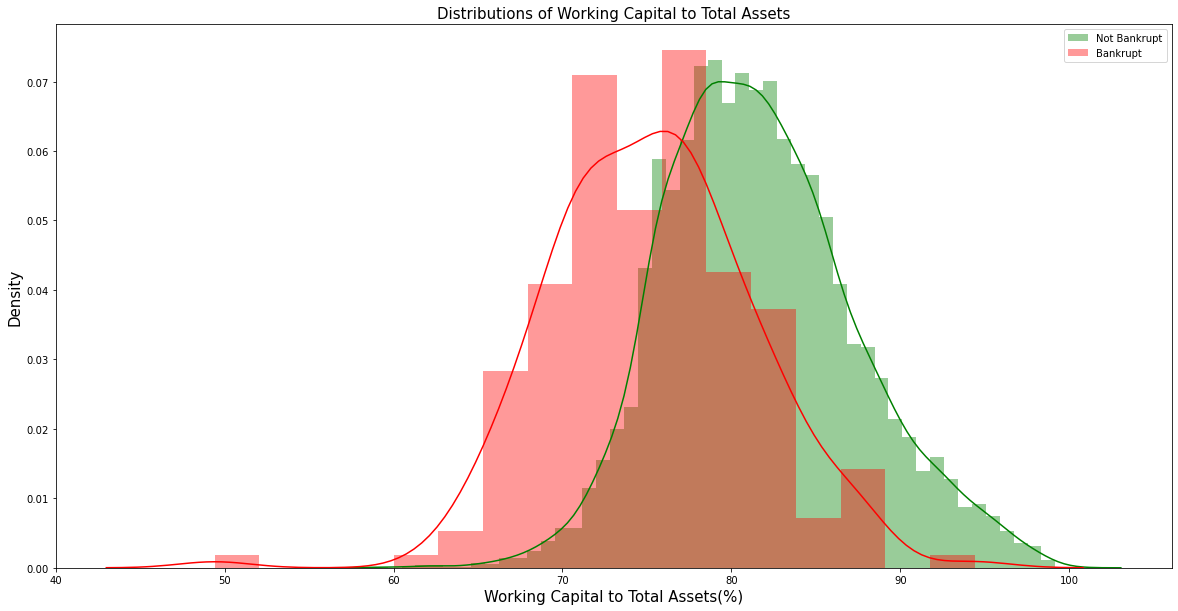

In [12]:
fig,ax = plt.subplots(figsize = (20,10))

ax = sns.distplot(df[df['Bankrupt?']==0]['Working Capital to Total Assets'].apply(lambda x: x*100), color = 'green', label = 'Not Bankrupt')
ax = sns.distplot(df[df['Bankrupt?']==1]['Working Capital to Total Assets'].apply(lambda x: x*100), color = 'red', label = 'Bankrupt')
ax.set_title('Distributions of Working Capital to Total Assets', fontsize = 15)
ax.set_xlabel('Working Capital to Total Assets(%)', fontsize = 15)
ax.set_ylabel('Density', fontsize = 15)
ax.legend(loc = 'upper right')
# ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

Long Term Liability to Current Assets was also significant for predictor of bankruptcy. We can see from the boxplot that bankrupt companies had higher Long-term Liabilities to Current Assets which intuitively makes sense. We saw various companies that had this ratio greater than 1 and less than 1. This relationship holds up for both segments. 
 

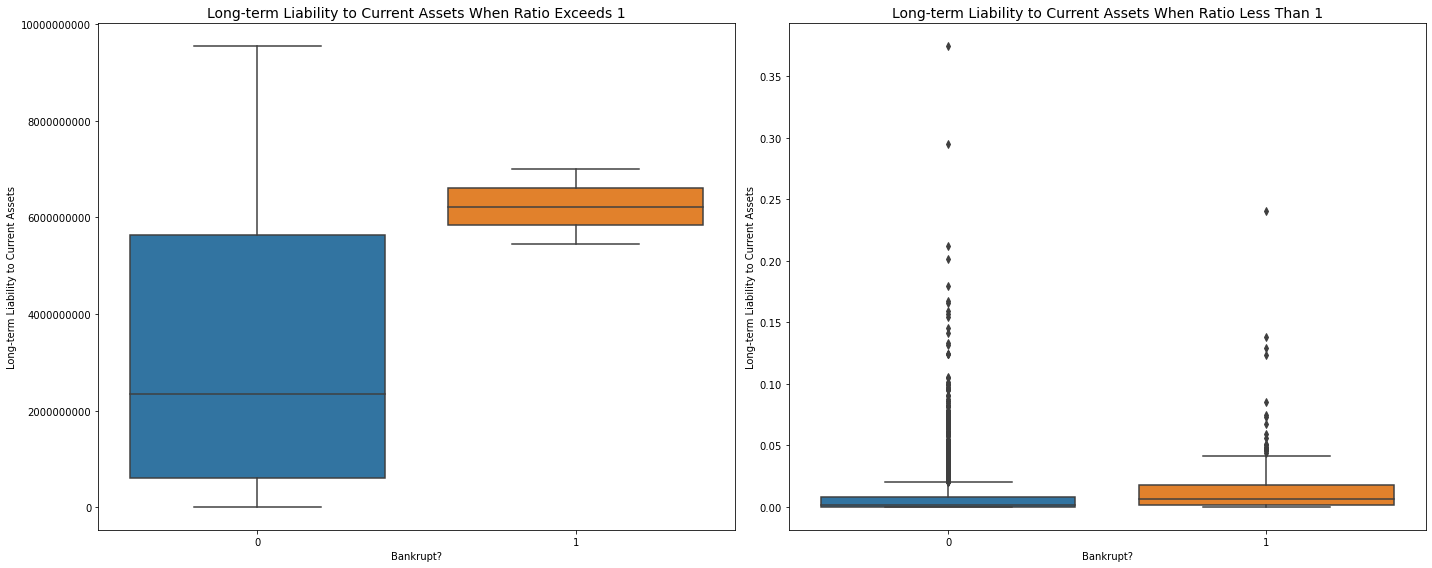

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,8))


sns.boxplot(x="Bankrupt?", y='Long-term Liability to Current Assets', data=df[df['Long-term Liability to Current Assets']>1],ax=ax1) 
ax1.set_title('Long-term Liability to Current Assets When Ratio Exceeds 1', fontsize=14)
ax1.get_yaxis().get_major_formatter().set_scientific(False)


sns.boxplot(x="Bankrupt?", y='Long-term Liability to Current Assets', data=df[df['Long-term Liability to Current Assets']<1],ax=ax2) 
ax2.set_title('Long-term Liability to Current Assets When Ratio Less Than 1', fontsize=14)
ax2.get_yaxis().get_major_formatter().set_scientific(False)

plt.tight_layout()

### Correlation Matrix of Best Features

In [14]:
from sklearn.feature_selection import SelectKBest
best_rf_features = ['ROA(C) before interest and depreciation before interest','ROA(A) before interest and % after tax','ROA(B) before interest and depreciation after tax','Operating Gross Margin','Realized Sales Gross Margin','Operating Profit Rate','Pre-tax net Interest Rate','Non-industry income and expenditure/revenue','Cash flow rate','Realized Sales Gross Profit Growth Rate','Operating Profit Growth Rate','Regular Net Profit Growth Rate','Continuous Net Profit Growth Rate','Total Asset Growth Rate','Current Ratio','Interest Expense Ratio','Debt ratio %','Total Asset Turnover','Working Capital to Total Assets','Quick Assets/Total Assets','Current Assets/Total Assets','Cash/Total Assets','Quick Assets/Current Liability','Current Liability to Assets','Operating Funds to Liability','Inventory/Working Capital','Current Liabilities/Liability','Current Liabilities/Equity','Retained Earnings to Total Assets','Total expense/Assets','Working capitcal Turnover Rate','Fixed Assets to Assets','Current Liability to Liability','Current Liability to Equity','Cash Flow to Total Assets','Cash Flow to Liability','CFO to Assets','Cash Flow to Equity','Current Liability to Current Assets','Net Income to Total Assets','No-credit Interval','Gross Profit to Sales','Liability to Equity','Degree of Financial Leverage (DFL)','Interest Coverage Ratio (Interest expense to EBIT)','Equity to Liability','Good_Quick_Ratio_1','Good_Debt_toNetWorth_1']
selector = SelectKBest(k=10)
selector.fit(df.drop(columns = 'Bankrupt?'), df['Bankrupt?'])

SelectKBest()

In [15]:
best_selectk10_features = list(df.drop(columns = 'Bankrupt?').columns[selector.get_support()])

In [16]:
best_selectk10_features.append('Bankrupt?')

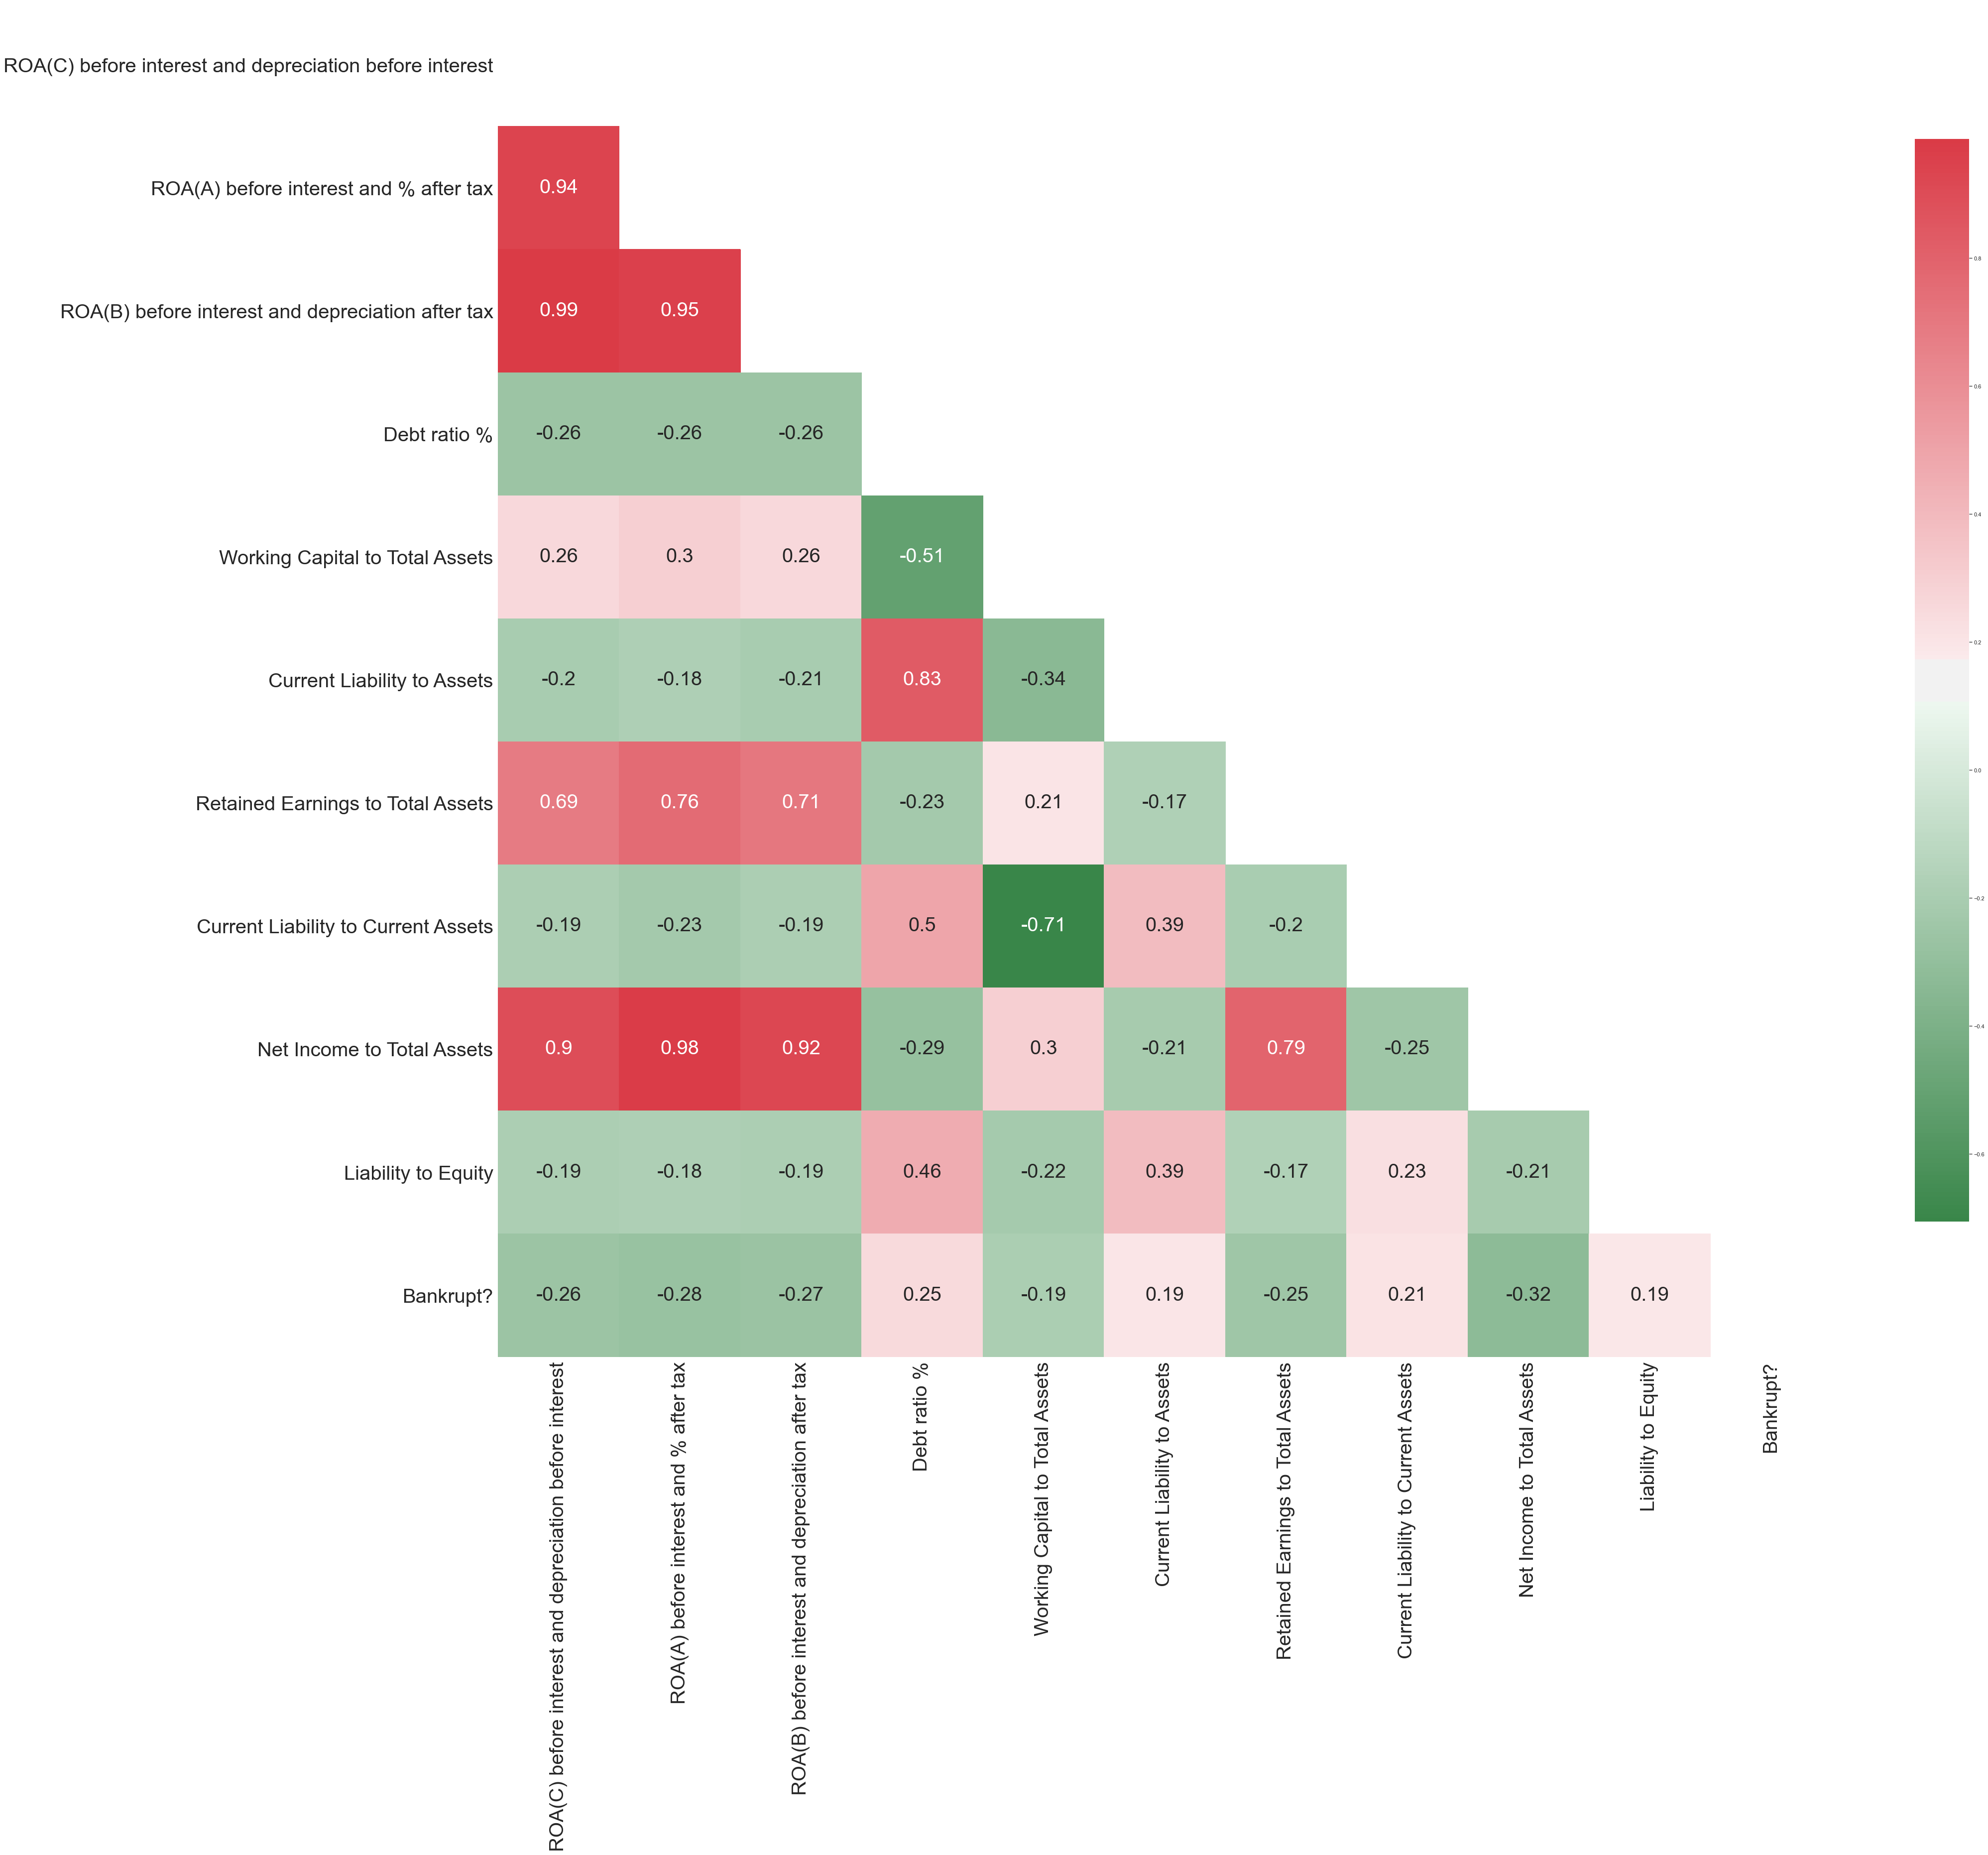

In [17]:
sns.set(style="white")
data = df[best_selectk10_features].corr()
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(60,50))
cmap = sns.diverging_palette(133, 10, as_cmap=True)  
g = sns.heatmap(data=data, annot=True, cmap=cmap, ax=ax, mask=mask, annot_kws={"size":40}, cbar_kws={"shrink": 0.8} )
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 40, rotation =90)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 40)
plt.show()

## Feature Engineering

In [18]:
df = modeling_functions.perform_feature_engineering(cleaned_df)
engineered_df = df.copy()

---
## Building Tuning and Testing Models

To handle the class imbalance we will test various models using SMOTE, Tomek Links, SMOTE and Tomek Links together, as well as no resampling. 

We will test out logistic regression, K nearest neighbors, decision trees, and gradient boosting to determine which algorithm performs best.

In [19]:
xdata = df.drop('Bankrupt?', axis = 1)
target = df['Bankrupt?']
xtrain, xtest, ytrain, ytest = train_test_split(xdata, target, random_state = 20, test_size=0.20)

In [20]:
resampling_methods = {'SMOTE' : [SMOTE(random_state = 20)], 'Tomek' : [TomekLinks()], 'Tomek+SMOTE': [TomekLinks(), SMOTE(random_state = 20)], 'no_resampling' : []}
models_trained = ['logisticregression', 'kneighbors', 'decisiontree', 'gradientboosting']
results_dict = {}




## WARNING: The below code blocks may take a few hours to run. 

We are running grid searches on every algorithm, some select hyperparameters, and each resampling technique.
We are saving the cross validation mean recall score, best parameters, and best estimator for later evaluation. 



### Logistic Regression

In [21]:
for name, method in resampling_methods.items():       
        model_instance, hyper_params_grid = modeling_functions.get_model_params('logisticregression')
        class_model_pipeline = modeling_functions.return_best_model(model_instance, hyper_params_grid, xtrain, ytrain, method)
        model_name = 'logisticregression'+'_'+name
        results_dict[model_name] = modeling_functions.best_model_score(class_model_pipeline)

{'logisticregression__C': 0.01, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
{'logisticregression__C': 0.01, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
{'logisticregression__C': 0.01, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
{'logisticregression__C': 0.01, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}


### K Nearest Neighbors

In [22]:
for name, method in resampling_methods.items():       
        model_instance, hyper_params_grid = modeling_functions.get_model_params('kneighbors')
        class_model_pipeline = modeling_functions.return_best_model(model_instance, hyper_params_grid, xtrain, ytrain, method)
        model_name = 'kneighbors'+'_'+name
        results_dict[model_name] = modeling_functions.best_model_score(class_model_pipeline)

{'kneighborsclassifier__n_neighbors': 17, 'kneighborsclassifier__weights': 'uniform'}
{'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__weights': 'uniform'}
{'kneighborsclassifier__n_neighbors': 17, 'kneighborsclassifier__weights': 'uniform'}
{'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__weights': 'uniform'}


### Decision Trees

In [23]:
for name, method in resampling_methods.items():       
        model_instance, hyper_params_grid = modeling_functions.get_model_params('decisiontree')
        class_model_pipeline = modeling_functions.return_best_model(model_instance, hyper_params_grid, xtrain, ytrain, method)
        model_name = 'decisiontree'+'_'+name
        results_dict[model_name] = modeling_functions.best_model_score(class_model_pipeline)

{'decisiontreeclassifier__class_weight': 'balanced', 'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_split': 10, 'decisiontreeclassifier__splitter': 'random'}
{'decisiontreeclassifier__class_weight': 'balanced', 'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_split': 3, 'decisiontreeclassifier__splitter': 'random'}
{'decisiontreeclassifier__class_weight': 'balanced', 'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_split': 5, 'decisiontreeclassifier__splitter': 'random'}
{'decisiontreeclassifier__class_weight': 'balanced', 'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_split': 3, 'decisiontreeclassifier__splitter': 'best'}


### Gradient Boosting

In [24]:
for name, method in resampling_methods.items():       
        model_instance, hyper_params_grid = modeling_functions.get_model_params('gradientboosting')
        class_model_pipeline = modeling_functions.return_best_model(model_instance, hyper_params_grid, xtrain, ytrain, method)
        model_name = 'gradientboosting'+'_'+name
        results_dict[model_name] = modeling_functions.best_model_score(class_model_pipeline)

{'gradientboostingclassifier__loss': 'exponential', 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__min_samples_split': 3}
{'gradientboostingclassifier__loss': 'deviance', 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__min_samples_split': 3}
{'gradientboostingclassifier__loss': 'exponential', 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__min_samples_split': 3}
{'gradientboostingclassifier__loss': 'deviance', 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__min_samples_split': 3}


In [25]:
results_dict

{'logisticregression_SMOTE': {'best_params': {'logisticregression__C': 0.01,
   'logisticregression__class_weight': 'balanced',
   'logisticregression__penalty': 'l1',
   'logisticregression__solver': 'liblinear'},
  'cv_mean_recall': 0.863637225742489,
  'pipeline_instance': GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
               estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                         ('smote', SMOTE(random_state=20)),
                                         ('logisticregression',
                                          LogisticRegression(max_iter=10000))]),
               param_grid={'logisticregression__C': [0.01, 0.1, 10],
                           'logisticregression__class_weight': ['balanced'],
                           'logisticregression__penalty': ['l1'],
                           'logisticregression__solver': ['liblinear']},
               scoring='recall'),
  'best_estimator': Pipeline(steps=

## Model Cross Validation Training Scores

We can see the cross validation results below. It appears Logistic Regression generally performs best, followed by decision trees, then K nearest neighbors. The different resampling methods also seem to have affected each of the models differently.

In [26]:
results_df = pd.DataFrame(results_dict).transpose().sort_values('cv_mean_recall', ascending = False)
results_df[['best_params', 'cv_mean_recall']]

,best_params,cv_mean_recall
logisticregression_Tomek,"{'logisticregression__C': 0.01, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}",0.875054
logisticregression_no_resampling,"{'logisticregression__C': 0.01, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}",0.869649
logisticregression_Tomek+SMOTE,"{'logisticregression__C': 0.01, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}",0.867781
logisticregression_SMOTE,"{'logisticregression__C': 0.01, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}",0.863637
decisiontree_Tomek,"{'decisiontreeclassifier__class_weight': 'balanced', 'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_split': 3, 'decisiontreeclassifier__splitter': 'random'}",0.805144
decisiontree_no_resampling,"{'decisiontreeclassifier__class_weight': 'balanced', 'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_split': 3, 'decisiontreeclassifier__splitter': 'best'}",0.801505
decisiontree_SMOTE,"{'decisiontreeclassifier__class_weight': 'balanced', 'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_split': 10, 'decisiontreeclassifier__splitter': 'random'}",0.795764
decisiontree_Tomek+SMOTE,"{'decisiontreeclassifier__class_weight': 'balanced', 'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_split': 5, 'decisiontreeclassifier__splitter': 'random'}",0.782163
kneighbors_SMOTE,"{'kneighborsclassifier__n_neighbors': 17, 'kneighborsclassifier__weights': 'uniform'}",0.762754
kneighbors_Tomek+SMOTE,"{'kneighborsclassifier__n_neighbors': 17, 'kneighborsclassifier__weights': 'uniform'}",0.752086


---
## Evaluate Best Models to Test Data 

We will take any model that had a mean recall score of at least .6 on the cross validation training data and score them on the held out test data. From there we will analyze which model actually performs best on unseen data. 

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, log_loss, roc_curve, roc_auc_score


In [28]:
final_models = list(results_df[results_df['cv_mean_recall'] > .6].index)

In [29]:
final_models

['logisticregression_Tomek',
 'logisticregression_no_resampling',
 'logisticregression_Tomek+SMOTE',
 'logisticregression_SMOTE',
 'decisiontree_Tomek',
 'decisiontree_no_resampling',
 'decisiontree_SMOTE',
 'decisiontree_Tomek+SMOTE',
 'kneighbors_SMOTE',
 'kneighbors_Tomek+SMOTE',
 'gradientboosting_Tomek+SMOTE',
 'gradientboosting_SMOTE']

In [30]:
test_results_dict = {k: None for k in final_models}

In [31]:
for name in final_models:
    model = results_dict[name]['pipeline_instance']
    score ={}
    score['test_f1']= f1_score(ytest, model.predict(xtest))
    score['test_accuracy'] = accuracy_score(ytest, model.predict(xtest))
    score['test_precision'] = precision_score(ytest, model.predict(xtest))
    score['test_recall'] =recall_score(ytest, model.predict(xtest))
    test_results_dict[name] = score

In [32]:
test_results_df = pd.DataFrame(test_results_dict).transpose().sort_values('test_recall', ascending=False)

In [33]:
test_results_df

,test_f1,test_accuracy,test_precision,test_recall
logisticregression_Tomek,0.230769,0.837758,0.133065,0.868421
logisticregression_no_resampling,0.230769,0.837758,0.133065,0.868421
logisticregression_Tomek+SMOTE,0.250000,0.853982,0.146018,0.868421
decisiontree_Tomek,0.320388,0.896755,0.196429,0.868421
logisticregression_SMOTE,0.245211,0.854720,0.143498,0.842105
decisiontree_SMOTE,0.270742,0.876844,0.162304,0.815789
decisiontree_no_resampling,0.243902,0.862832,0.144231,0.789474
decisiontree_Tomek+SMOTE,0.307692,0.900442,0.191083,0.789474
gradientboosting_Tomek+SMOTE,0.353659,0.921829,0.230159,0.763158
gradientboosting_SMOTE,0.367089,0.926254,0.241667,0.763158


In [34]:
total_result = test_results_df.join(results_df[['best_params', 'cv_mean_recall']])

In [35]:
total_result

,test_f1,test_accuracy,test_precision,test_recall,best_params,cv_mean_recall
logisticregression_Tomek,0.230769,0.837758,0.133065,0.868421,"{'logisticregression__C': 0.01, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}",0.875054
logisticregression_no_resampling,0.230769,0.837758,0.133065,0.868421,"{'logisticregression__C': 0.01, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}",0.869649
logisticregression_Tomek+SMOTE,0.250000,0.853982,0.146018,0.868421,"{'logisticregression__C': 0.01, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}",0.867781
decisiontree_Tomek,0.320388,0.896755,0.196429,0.868421,"{'decisiontreeclassifier__class_weight': 'balanced', 'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_split': 3, 'decisiontreeclassifier__splitter': 'random'}",0.805144
logisticregression_SMOTE,0.245211,0.854720,0.143498,0.842105,"{'logisticregression__C': 0.01, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}",0.863637
decisiontree_SMOTE,0.270742,0.876844,0.162304,0.815789,"{'decisiontreeclassifier__class_weight': 'balanced', 'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_split': 10, 'decisiontreeclassifier__splitter': 'random'}",0.795764
decisiontree_no_resampling,0.243902,0.862832,0.144231,0.789474,"{'decisiontreeclassifier__class_weight': 'balanced', 'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_split': 3, 'decisiontreeclassifier__splitter': 'best'}",0.801505
decisiontree_Tomek+SMOTE,0.307692,0.900442,0.191083,0.789474,"{'decisiontreeclassifier__class_weight': 'balanced', 'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_split': 5, 'decisiontreeclassifier__splitter': 'random'}",0.782163
gradientboosting_Tomek+SMOTE,0.353659,0.921829,0.230159,0.763158,"{'gradientboostingclassifier__loss': 'exponential', 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__min_samples_split': 3}",0.665
gradientboosting_SMOTE,0.367089,0.926254,0.241667,0.763158,"{'gradientboostingclassifier__loss': 'exponential', 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__min_samples_split': 3}",0.658142


#### Saving Models and Results

In [36]:
import pickle

to_pickle = [results_dict, total_result]

pickle_out = open("final_results.pickle","wb")
pickle.dump(to_pickle, pickle_out)
pickle_out.close()

## Conclusion

We can see from the above data frame that the best performing model, optimizing for recall, was logistic regression fit using Tomek Links resampling with paramters C = 0.01, class_weight = 'balanced', penalty = 'l1', solver = 'liblinear'. The mean cross validation recall score was .868 and the test recall score was .875 showing fairly low variance. We believe that given similar market conditions to the years covered in our dataset and access to similar data, we could deploy this model to unseen data and continue to predict roughly 87% of companies that go bankrupt out of the companies that actually did go bankrupt.
The added benefit of having logistic regression as our best model is that we can adapt to a potential client's risk tolerance by increasing or decreasing the probability threshold by which the model would predict a company would go bankrupt.




### Next Steps
In order to improve our modelling the below further steps can be taken
- Add more company financial data outside of the given financial ratios
- Add company industries and industry specific data
- Add local and global economic condition data for the time period
- Test with more classification machine learning algorithms and hyperparamters for tuning the models we used. With limited time and computing power we had to cut many hyperparameters to test in our grid search

